# Collaborative Filtering

## 1. 협업 필터링
여러 유저의 과거 아이템 상호작용 정보를 이용해 추천하는 방법  
```
상호작용 정보 예시  
- 영화 평점
- 제품 사용 리뷰
- 동영상 시청 시간
- 클릭 횟수
```

## 2. 메모리 기반 (Memory Based)
여러 유저의 과거 아이템 상호작용 정보를 메모리에 저장하고 추천이 필요할 때마다 전체 데이터를 이용해서 추천  

### 메모리 기반 종류
1. 유저 기반
  - 아이템 선호도가 비슷한 유저를 탐색하고 비슷한 유저가 좋아한 것 중 새로운 아이템 추천
    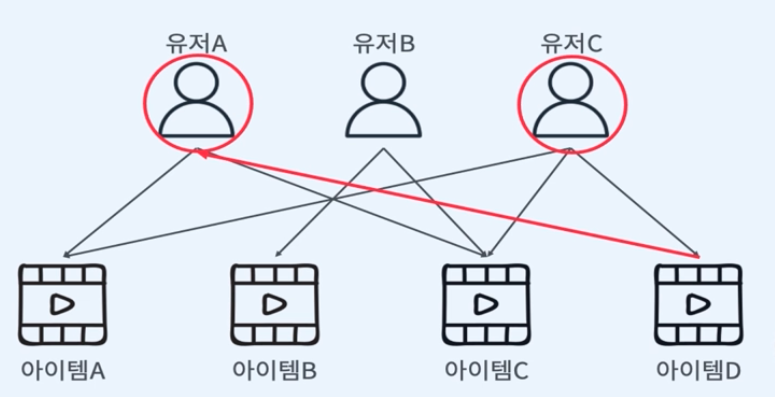
  - 위의 경우에서 유저 A와 유저 C가 유사한 아이템을 좋아했으므로 유저 A에게 유저 C가 좋아했던 아이템 D를 추천하는 방식  
2. 아이템 기반
  - 유저들의 선호도가 비슷한 아이템을 탐색하고 유저가 기존에 선호한 아이템과 유사한 아이템 추천
    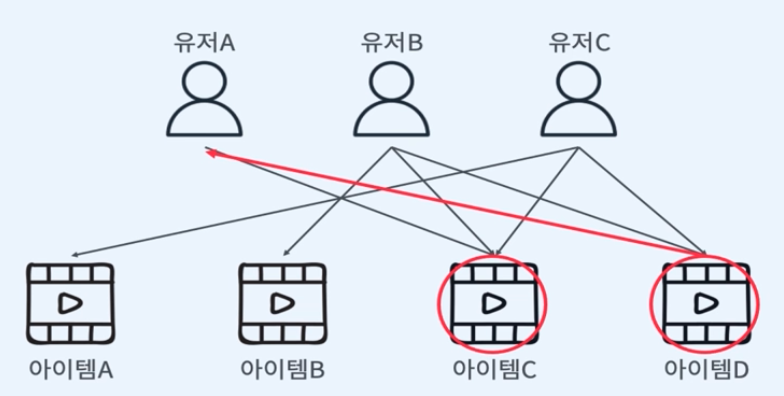
  - 유저 B, 유저 C를 보면 아이템 C를 좋아했던 유저는 모두 아이템 D를 좋아했으므로 아이템 C와 아이템 D는 유사하다고 판단되어 유저 A에게 아이템 D를 추천


## 3. KNN
### KNN 협업 필터링
- 가장 유사한 K개의 이웃을 통해 아이템을 추천하는 방법  
- 유저별 아이템 선호도 예측

### KNN 협업 필터링 종류
1. KNN Basic
  - 단순한 KNN 사용
2. KNN with Means
  - 약간의 가중치를 두어 KNN 사용

### KNN Basic 유저 기반  
아이템 i에 대한 유저 u의 선호도를 예측  

**KNN Basic 유저 기반 수식**  
$\hat{r_{ui}} = {\sum_{v \in N_{i}^{k}(u)}sim(u, v)r_{vi} \over \sum_{v \in N_i^k(u)}sim(u,v)}$

#### KNN Basic 유저 기반 방법  
1. 유저간의 유사도를 계산
2. 아이템 i를 평가한 유저들 중에서 유저 u와 비슷한 유저 k명을 찾음  
3. K명의 유사한 유저들이 아이템 i에 평가한 선호도를 유사도 기준으로 가중 평균  
4. 예측 선호도가 높은 아이템을 유저에게 추천

#### KNN Basic 유저 기반 예시  
유저 B의 선호도 예측하기

||아이템 A|아이템 B|아이템 C|아이템 D|아이템 E|
|:--:|:--:|:--:|:--:|:--:|:--:|
|유저 A|4|?|4|3|?|
|유저 B|3|4|?|2|?|
|유저 C|?|?|4|5|3|
|유저 D|3|?|2|?|4|

**Step 1 - 유저간의 유사도를 계산**  
표의 결측치를 0으로 채움  

||아이템 A|아이템 B|아이템 C|아이템 D|아이템 E|
|:--:|:--:|:--:|:--:|:--:|:--:|
|유저 A|4|0|4|3|0|
|유저 B|3|4|0|2|0|
|유저 C|0|0|4|5|3|
|유저 D|3|0|2|0|4|

유저 B와 다른 유저간의 코사인 유사도 계산  

||유저A|유저B|유저C|유저D|
|:--:|:--:|:--:|:--:|:--:|
|유저B|0.52|1|0.26|0.31|.

**Step 2 - 아이템을 평가한 유저들 중에서 유저 u와 비슷한 유저를 K명 찾음**  
1. K=2인 경우 아이템 C에 대해 평가
  - 유저 B와 코사인 유사도가 높은 순서: 유저 A > D > C
  - 아이템 C를 평가한 유저: 유저 A, C, D
  - 아이템 C에 대한 $N_C^2(유저B) = \{유저A, 유저 D)$
2. K=2인 경우 아이템 E에 대해 평가  
  - 유저 B와 코사인 유사도가 높은 순서: 유저 A > D > C
  - 아이템 E를 평가한 유저: 유저 C, D
  - 아이템 C에 대한 $N_E^2(유저B) = \{유저C, 유저 D)$


**Step 3 - K명의 유사한 유저들의 선호도를 유사도 기준으로 가중 평균**  
K=2인 경우  
1. 아이템 C
  - $N_C^2(유저B) = \{유저A, 유저 D)$
  - $\hat{r_{BC}} = {0.52 * r_{AC} + 0.31 * r_{DC} \over 0.52 + 0.31} = 4$
2. 아이템 E
  - $N_E^2(유저B) = \{유저C, 유저 D)$
  - $\hat{r_{BC}} = {0.26 * r_{CE} + 0.31 * r_{DE} \over 0.26 + 0.31} = 3.54$

**Step 4 - 예측 선호도가 높은 아이템을 유저에게 추천**

||아이템 A|아이템 B|아이템 C|아이템 D|아이템 E|
|:--:|:--:|:--:|:--:|:--:|:--:|
|유저 A|4|0|4|3|0|
|유저 B|3|4|**4**|2|**3.54**|
|유저 C|0|0|4|5|3|
|유저 D|3|0|2|0|4|

선호도가 더 높게 계산된 아이템 C를 추천 가능


### KNN Basic 아이템 기반  
아이템 i에 대한 유저 u의 선호도를 예측  

#### KNN Basic 아이템 기반 수식  
$\hat{r_{ui}} = {\sum_{j \in N_{u}^{k}(i)}sim(i, j)r_{uj} \over \sum_{j \in N_u^k(i)}sim(i, j)}$

#### KNN Basic 아아템 기반 방법
1. 아이템간의 유사도를 계산  
2. 아이템 i와 비슷한 아이템을 k개 찾음
3. 유저가 평가한 K개의 아이템의 선호도를 유사도 기준으로 가중 평균  
4. 예측 선호도가 높은 아이템을 유저에게 추천

### KNN with Means
- 선호도의 평균에 선호도 편차를 유사도 기준으로 가중 평균을 더하는 방법  
- 유저나 아이템의 평균 선호도를 반영  

#### KNN with Means 유저 기반 수식  
$\hat{r_{ui}} = \mu_{i} + {\sum_{v \in N_{i}^{k}(u)}sim(u, v)r_{vi} \over sum_{v \in N_{i}^{k}(u)}sim(u,v)}$

#### KNN with Means 유저 기반 방법  
1. 유저간의 유사도를 계산
2. 아이템 i를 평가한 유저들 중에서 유저 u와 비슷한 유저 k명을 찾음  
3. 아이템 i의 평균 선호도를 계산
4. K명의 유사한 유저들이 아이템 i에 평가한 선호도의 편차를 유사도 기준으로 가중 평균  
5. 예측 선호도가 높은 아이템을 유저에게 추천

#### KNN with Means 아이템 기반 수식  
$\hat{r_{ui}} = \mu_{u} + {\sum_{j \in N_{u}^{k}(i)}sim(i, j)r_{uj} \over sum_{j \in N_{u}^{k}(i)}sim(i,j)}$

#### KNN with Means 아이템 기반 방법  
1. 아이템간의 유사도를 계산
2. 아이템 i와 비슷한 아이템을 k개 찾음  
3. 아이템 i의 평균 선호도를 계산
4. 유저가 평가한 K개의 아이템의 선호도릐 편차를 유사도 기준으로 가중 평균
5. 예측 선호도가 높은 아이템을 유저에게 추천


#### KNN with Means 아이템 기반 예시  
유저 B의 아이템 C, E에 대한 선호도 계산  

||아이템 A|아이템 B|아이템 C|아이템 D|아이템 E|
|:--:|:--:|:--:|:--:|:--:|:--:|
|유저 A|4|?|4|3|?|
|유저 B|3|4|?|2|?|
|유저 C|?|?|4|5|3|
|유저 D|3|?|2|?|4|


**Step 1 - 유저간의 유사도를 계산**  
표의 결측치를 0으로 채움  

||아이템 A|아이템 B|아이템 C|아이템 D|아이템 E|
|:--:|:--:|:--:|:--:|:--:|:--:|
|유저 A|4|0|4|3|0|
|유저 B|3|4|0|2|0|
|유저 C|0|0|4|5|3|
|유저 D|3|0|2|0|4|

아이템 C, E와 다른 아이템 간의 코사인 유사도 계산  

||아이템A|아이템B|아이템C|아이템D|아이템E|
|:--:|:--:|:--:|:--:|:--:|:--:|
|아이템C|0.63|0|1|0.87|0.67|
|아이템E|0.41|0|0.67|0.49|1|


**Step 2 - 유저 u가 평가한 아이템들 중에서 비슷한 아이템을 K개 찾음**  
1. K=2인 경우 아이템 C에 대해 평가
  - 아이템 C와 코사인 유사도가 높은 순서: 아이템 D > E > A > B
  - 아이템 E는 선택을 하지 않았으므로 아이템 D, E중 아이템 D만 남게 됨 (아이템 E에 대한 정보는 없음)
  - 아이템 C에 대한 $N_{userB}^2(아이템C) = \{아이템D)$
2. K=2인 경우 아이템 E에 대해 평가  
  - 아이템 E와 코사인 유사도가 높은 순서: 아이템 C > D > A > B
  - 아이템 C는 선택을 하지 않았으므로 아이템 C, D중 아이템 D만 남게 됨 (아이템 C에 대한 정보는 없음)
  - 아이템 E에 대한 $N_{userB}^2(아이템E) = \{아이템D)$


**Step 3 - 아이템의 평균 선호도를 계산**  

||아이템A|아이템B|아이템C|아이템D|아이템E|
|:--:|:--:|:--:|:--:|:--:|:--:|
|유저 A|4|0|4|3|0|
|유저 B|3|4|0|2|0|
|유저 C|0|0|4|5|3|
|평균|3.33|4|3.33|3.33|3.5|


**Step 4 - 유저가 평가한 K개의 아이템의 선호도의 편차를 유사도 기준으로 가중 평균**
K=2인 경우  
1. 아이템 C
  - $N_{userB}^2(아이템C) = \{아이템D)$
  - $\hat{r_{BC}} = \mu_{itemC} + {0.87 * (r_{BD} - \mu_{itemD}) \over 0.87} = 3.33 + (-1.33) = 2$
2. 아이템 E
  - $N_{userB}^2(아이템E) = \{아이템D)$
  - $\hat{r_{BE}} = \mu_{itemE} + {0.87 * (r_{BD} - \mu_{itemD}) \over 0.87} = 3.5 + (-1.33) = 2.17$

**Step 5 - 예측 선호도가 높은 아이템을 유저에게 추천**

||아이템 A|아이템 B|아이템 C|아이템 D|아이템 E|
|:--:|:--:|:--:|:--:|:--:|:--:|
|유저 A|4|0|4|3|0|
|유저 B|3|4|**2**|2|**2.17**|
|유저 C|0|0|4|5|3|
|유저 D|3|0|2|0|4|

방법 1: 아이템 C와 E 중 평가 예상 점수가 높은 아이템 E를 추천  
방법 2: 두 아이템 모두 평균 점수보다 낮으므로 추천하지 않음  




# Collaborative Filtering 2

## 모델 기반
- 여러 유저의 과거 아이템 상호작용 정보를 이용해 추천을 위한 모델을 학습하고, 학습된 모델을 이용해 추천  
- 메모리 기반 협업 필터링은 좋은 성능을 보이지만 모든 데이터를 메모리에 저장해야하므로 많은 리소스가 필요함  


## Matrix Factorization
유저 아이템 행렬을 유저와 아이템 행렬로 분해하는 방법  

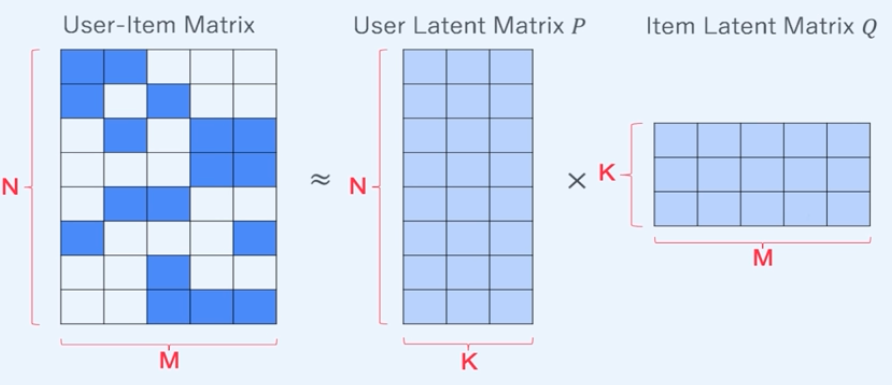

위와 같이 유저-아이템 matrix를 유저와 아이템 각각의 matrix로 분리한 뒤 선호도에 대한 (N, M) 예측 행렬인 $ \hat{R} $ 계산   

위에서 K는 유저와 아이템이 공유하는 잠재 요인을 의미


### 예시  
유저-영화 평점 이력  

||영화 A|영화 B|영화 C|영화 D|영화 E|
|:--:|:--:|:--:|:--:|:--:|:--:|
|유저 A|5|2||4||
|유저 B|2|1||5|4|
|유저 C|5|||5||
|유저 D||2|3||5|

이 때 각 유저마다 장르 선호도라는 잠재 요인이 있을 수 있음  
따라서 위의 매트릭스를 유저 - 장르 선호도 와 장르 선호도 - 아이템 행렬로 나누면 아래 매트릭스가 생성됨  

||코미디|액션|
|:--:|:--:|:--:|
|유저A|1|-2|
|유저B|1|1|
|유저C|2|1|
|유저D|-1/2|3|

||영화 A|영화 B|영화 C|영화 D|영화 E|
|:--:|:--:|:--:|:--:|:--:|:--:|
|코미디|3|2|0|10/3|2|
|액션|-1|1|1|-1/3|2|

이를 통해 아직 유저가 평가하지 않은 영화에 대한 선호도를 예측할 수 있는데, 예를 들어 유저 C의 영화 E에 대한 선호도는 (2 * 2) + (2 * 1) = 6임

K는 유저와 아이템 행렬이 공유하는 잠재 요인으로 위의 경우에는 코미디 / 액션이라는 2가지 항목으로 나타남  

### Gradient Descent를 이용한 Matrix Factorization 학습  
1. P와 Q를 랜덤 값으로 초기화  
2. $\hat{R}$ 계산  
3. $R$과 $\hat{R}$의 오차 계산
4. Gradient Descent를 이용해 P와 Q를 업데이터  
5. 2~4 과정 반복  

#### Step 1) P와 Q를 랜덤 값으로 초기화  
K = 2 인 경우  

$r_{AB} = 4$  
$P_{A}^{T} = [2,3]$   
$q_{B}^{T} = [-3, 4]$

(위에서 p, q는 잠재요인 K에 해당)

#### Step 2) $\hat{R}$ 계산  

$r_{AB} = 4$  
$P_{A}^{T} = [2,3]$   
$q_{B}^{T} = [-3, 4]$

$\hat{r_{AB}} = p_{A}^{T}q_{B} = 2 * (-3) + 3 * 4 = 6$

#### Step 3) R과 $\hat{R}$의 오차 계산  

$r_{AB} = 4$  
$P_{A}^{T} = [2,3]$   
$q_{B}^{T} = [-3, 4]$

$\hat{r_{AB}} = p_{A}^{T}q_{B} = 2 * (-3) + 3 * 4 = 6$  
$e_{AB} = r_{AB} - \hat{r_{AB}} = -2$

#### Step 4) Gradient Descent를 이용해 P와 Q를 업데이트  
$\gamma = 0.005$  
$p'_{A} = p_{A} + 2\gamma e_{AB}q_{B} = [2.06, 2.92]$  
$q'_{B} = q_{B} + 2\gamma e_{AB}p_{A} = [-3.04, 3.94]$  

#### Step 5) 2 ~ 4 과정 반복  
$\gamma = 0.005$  
$p_{A}^T = [2.06, 2.92]$  
$q_{B}^T = [-3.04, 3.94]$  
$\hat{r_{AB}} = p_{A}^Tq_{B} = 5.24$  
$e_{AB} = r_{AB} - \hat{r_{AB}} = -1.24$    
$p'_{A} = p_{A} + 2\gamma e_{AB}q_{B} = [2.098, 2.87]$  
$q'_{B} = q_{B} + 2\gamma e_{AB}p_{A} = [-3.065, 3.9]$  

위의 과정을 실제 점수와 차이가 적을 때까지 반복하면 됨  